# Programming Exercise 6: Neural Networks

Neural networks (NN) are essentially the closest we've come to universal function approximators. All the hype you've been hearing about Deep Learning and "AI" are due to advances in NNs. These beasts deserve a separate course, but here you'll get to learn how a basic NN works

If you recall logistic regression, we use model a classification problem as a non-linear function of the input vector.
When the problem in question is quite complicated, and the number of possible input features are large, simple classification, regression or classic ML techniques have limited ability. Composing functions of functions, say $f( g( h(X,W_{0}),W_{1}),W_{2}) $ would be better equipped to 'learn' more complicated functions. 

NNs are effectively compositions of functions consisting of layers of 'nodes'. The permuted connections between these nodes allow complex 'functions' to be 'learnt'. Depicted below is a 3-layer NN, consisting of an input layer, a 'hidden' layer and an output layer.

Why provide an elaborate explanation when this beautiful visualization exists:
https://www.youtube.com/watch?v=aircAruvnKk ?

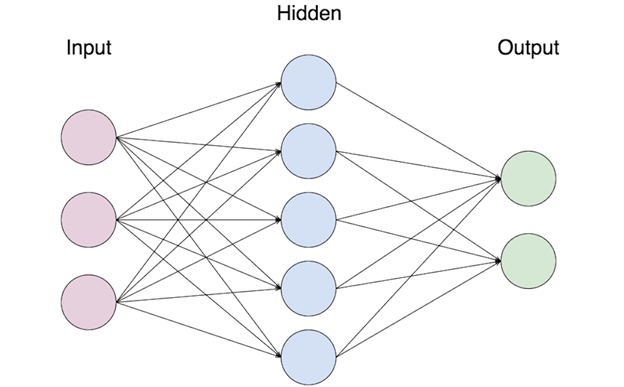

In [6]:
from IPython.display import Image
Image("nn.png")

### To start off, let's first visualise logistic regression in terms of a NN

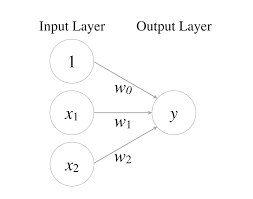

In [7]:
from IPython.display import Image
Image("nnlogic.png")

Here we have a 2-layer NN, which is effectively a logistic regression model. The input layer is X and output layer is a single node y. The connections from the input layer to the output layer represent the weights that are to be 'learnt', and represented as a matrix W such that sigmoid(W*X) = y

So a 3-Layer NN with a h-neuron hidden layer would essentially be h ~logistic regressions of the input times y ~logistic regressions of the hidden layer. So there would be x*h + h*w weights to be learnt.

## Forward Pass

The computation of the output layer by composing functions through each hidden layer is called forwards propagation. These functions are called 'activations' and are non-linear in nature. Let's say we have an input feature vector X, a single hidden layer witha sigmoid activation and an output layer with a sigmoid activation.

A forward-pass is then given by:

$ Y' = \sigma( W_{2}.( \sigma( W_{1}.X)))$

Where $W_{1}$ and $W_{2}$ are the weights/parameters to be learnt, $X$ is the input vector and $Y'$ is the output vector of the NN 

## Back-Propagation

Remember how we optimised the model in logistic regression? We used the partial differentials of the Cost function w.r.t the weight we were trying to optimize. Same concept, but because we have a composition of functions, we use the chain rule. So let's say cost function $J(x,W_{1},W_{2}, Y) = f( g(x,W_{1}),W_{2},Y) $. 
Then $  \frac{\delta J}{\delta W_{1}} = \frac{\delta f}{\delta g} * \frac{\delta g}{\delta W_{1}} $

The optimising step would then be $ W_{1} \rightarrow W_{1} - \alpha*\frac{\delta J}{\delta W_{1}}$

## In order to get a better grasp of how NNs work, let's build one from scratch using numpy and python

This tutorial uses python classes in order to build a kind of NN-library. This is to help us breakdown the different components that go into a NN and then be able to build different architectures of NN more easily. 

This also allows us to peek into the inner workings of the NN since we can print the weights between any two layers to understand what is happening there. 

You are required to complete the code where it says # INSERT CODE HERE #

It is advised to run 'unit' tests on each block you finish, where possible, by perhaps using a random array.

A quick primer on python objects:

In [56]:
class Object:                    #This is a class, it can have 'members' that are functions or data
    def __init__(self,x):          # the __init__ function initialises the class Object whenever a object is declared
        self.A = x               # here, a data member A (accessed as self.A) is assigned x whenever an object is created
    def mem_function(self,X):    # this is a member function, it can access the class's data and use external parameters
        self.B = self.A+X        # here another data member is created and assigned a value
        
obj = Object(2)                  # here an Object object is created as obj
obj.mem_function(3)              # here the member function is called using <class_name>.<functoin_name>
obj.B                            # this is how the object's data can be accessed

5

In [18]:
import numpy as np
import struct
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Data Preprocessing

The below functions are trivial and can be skipped, unless, you want to come up with a cleaner way to do them ;)

In [9]:
def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
    
def flatten_imgs(X):
    n_img = np.shape(X)[0]
    h = np.shape(X)[1]
    w = np.shape(X)[2]
    size_arr = h*w
    return np.reshape(X,(n_img,size_arr))

### One hot encoding 

One hot encoding is basically representing a class as a boolean vector: e.g if we have 3 classes (let's say classes 1,2,3 ) and we want to represent class '1'. We would do this as [1 0 0]$^{T}$. Class '2' would be [0 1 0]$^{T}$ and so on.. 

One hot encoding allows us to output a probability distribution vector [p1 p2 p3]$^{T}$ such that these probabilities represent the likelihood of the particular class. So a vector [0.9 0.02 0.08]$^{T}$ would mean that the output represents class 1 with a 0.9 probability

In [10]:
def one_hot(Y, n_class):
    #accept a (1xm) 'label' vector, number of classes  
    #and return a nxm 'one-hot' matrix
    
    # INSERT CODE HERE #
    
    return O

It is useful to have the inverse encoding from on-hot representation. Thus:

In [11]:
def inv_one_hot(O):
    # do the inverse of the one_hot function  
    
    # INSERT CODE HERE #
    
    return Y

Neural networks can quickly get messy if the input data is not normalized. You could try implementing the NN without normalizing the data and find out how it affects the performance.

In [12]:
def normalize(X):
    # normalize the matrix X using the (mean,std) normalization method 
    
    # INSERT CODE HERE #
    
    return N_X

In order to effectively measure the performance of our model we can define a 'metric'. Here we use a straight-forward 'right or not' method

In [13]:
def model_accuracy(H,Y):
    n = np.shape(H)[1]
    err = 0
    for i in range(n):
        if H[0,i]!=Y[0,i]:
            err += 1
    accuracy = (1 - err/n)
    return accuracy

## Activation Functions

Each node except those in the input layer represents an activation function, which applies a 'non-linearity' to its input parameter.

ML Researchers have empirically found several different activation functions to work with their respective pros and cons. Listed below are the most popular.
Softmax is a unique activation function in that it is used in multiclass classification i.e for categorical data.

For some more comprehension: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

|Activation|Equation|
|----|---------|
|<img width=50/>|<img width=100/>|
|Sigmoid| $ \sigma(x) = \frac{1}{1+e^{-x}} $ |
| Tanh | $tanh(x)$ |
| ReLu | $ max(0,x)$    |
| Softmax| $ \frac{e^{x_{i}}}{\sum e^{x_{i}}} $ |

In [58]:
class sigmoid:
    def activate(Z):
        #compute A = sigmoid(Z)
        
        # INSERT CODE HERE #
        
        return A
    
    def diff(self,Z):
        #dsig = diff(sigmoid(Z))
        
        # INSERT CODE HERE #
        
        return dsig
    
class tanh:
    def activate(Z):
        #compute A = tanh(Z)
        
        # INSERT CODE HERE #
        
        return A

    def diff(self,Z):
        #dsig = diff(tanh(Z))
        
        # INSERT CODE HERE #
        
        return d_tanh
    
class relu:
    def activate(Z):
        #compute A = relu(Z)
        
        # INSERT CODE HERE #
        
        return A
    
    def diff(self,Z):
        #dsig = diff(relu(Z))
        
        # INSERT CODE HERE #
        
        return d_rel
    
# let's leave sigmoid :)
class softmax:
    def activate(Z):
        e_Z = np.exp(Z- np.max(Z,axis=0))
        return e_Z / e_Z.sum(axis=0)
    
    def diff(Z):
        return Z
    

## Loss Functions

Loss functions or 'Cost functions' are what are to be minimised. They act as a proxy of the performance of the NN. 

For more comprehension: https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

In [59]:
class CE_loss:
    def get_loss(H,Y):
        #L = Cross_Entropy_Loss(H,Y)
        
        # INSERT CODE HERE #
        
        return L
    
    def diff(H,Y):
        #dZ = diff(Cross_Entropy_Loss(H,Y))
        
        # INSERT CODE HERE #
        
        return dZ

### Weight Initialization

Initialization of the weights of a neural network can affect its performance. 
Empirically, it was found that each activation function has its own 'optimal' initialization

Initializations taken from : https://medium.com/usf-msds/deep-learning-best-practices-1-weight-initialization-14e5c0295b94

In [15]:
#Initialize Matrix
def init_theta(n1,n2,activation):
    
    if activation in [sigmoid,softmax]:
        M = np.random.randn(n2,n1)*np.sqrt(2./n1)
    
    elif activation in [relu,leaky_relu] :
        M = np.random.randn(n2,n1)*np.sqrt(1./n1)
    
    elif activation == tanh:
        M = np.random.randn(n2,n1)*np.sqrt(1./(n1+n2))
    return M

### Loading data, and partitioning train and test set

If you want to find out what happens when the input is not normalized, comment out the normalize function calls

In [16]:
X = read_idx('data/MNIST/train/train-images-idx3-ubyte')
X = flatten_imgs(X)
X = normalize(X)               # Try without this
X = np.transpose(X)

Y = read_idx('data/MNIST/train/train-labels-idx1-ubyte')
Y = np.expand_dims(Y, axis=1)
Y = np.transpose(Y)
Y = one_hot(Y,10)

X_test = read_idx('data/MNIST/test/t10k-images.idx3-ubyte')
X_test = flatten_imgs(X_test)
X_test = normalize(X_test)     # Try without this
X_test = np.transpose(X_test)

Y_test = read_idx('data/MNIST/test/t10k-labels.idx1-ubyte')
Y_test = np.expand_dims(Y_test, axis=1)
Y_test = np.transpose(Y_test)
Y_test = one_hot(Y_test,10)

FileNotFoundError: [Errno 2] No such file or directory: 'data/MNIST/train/train-images-idx3-ubyte'

### Let's visualise what one sample of our dataset looks like

In [60]:
i = 8
plt.imshow(X[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(Y[:,i])

NameError: name 'X' is not defined

In [9]:
class layer:
    def __init__(self, n_prev, n_next, activation):
        # Initialise the parameters related to the layer using init_theta(n1,n2,activation)
        self.W = # INSERT CODE HERE #
        self.B = # INSERT CODE HERE #
        
        self.activation = activation
        
        #ignore this for now
        self.V_dW = np.zeros(self.W.shape)
        self.V_dB = np.zeros(self.B.shape)
        
    def forward(self, A0):
        
        #Compute Z and A using self.W, self.B and self.activation.activate
        
        self.Z = # INSERT CODE HERE #
        self.A = # INSERT CODE HERE #
        return self.A
    
    def grad(self, dZ, W, A0, m):
        
        # Apply Chain Rule to find dA, dAdZ, dZ, dW, dB  (take dA =~ deltaJ/deltaA, same for dZ, dW, dB etc)
        
        dA = # INSERT CODE HERE #
        dAdZ = # INSERT CODE HERE #
        self.dZ = # INSERT CODE HERE #
        self.dW = # INSERT CODE HERE #
        self.dB = # INSERT CODE HERE #
        
# we define out_grad separately because we find dH/dZ directly and not dH/dA*dA/dZ. If you have any ideas, feel free to change this!   
    def out_grad(self, dZ, A0, m):
        
        self.dZ = dZ
        #Compute self.dW and self.dB 
        self.dW = # INSERT CODE HERE #
        self.dB = # INSERT CODE HERE # remember to pass keepdims=True as last parameter!
        
    def step(self, lr, beta):
        #consider these instead of dW and dB. V_dW and V_dB are used to build 'momentum'. if beta is 0, this is effectively dW and dB
        self.V_dW = (beta * self.V_dW + (1. - beta) * self.dW)
        self.V_dB = (beta * self.V_dB + (1. - beta) * self.dB)
        
        #the update steps for the weight and bias use self.V_dW and self.V_dB intead of self.dW and self.dB
        self.W = self.W # INSERT CODE HERE #
        self.B = self.B # INSERT CODE HERE #

## Let's build a Neural Network!

We finally get to define the NN below. We are free to choose the number of hidden layers and the respective sizes, the activation functions for each of these, the loss function etc. This is where the object oriented setup helps.

In [10]:
class MNIST_net:
    def __init__(self, X_size, Y_size, lossfn):
        
        # Feel free to change the number of nodes within the layers!
        # To add more layers, all you have to do is add them here,make appropriate additions in f_pass, back_prop and optim as well!
        self.L1 = layer(X_size, 500, relu)
        self.L2 = layer(500, 150, relu)
        self.L3 = layer(150, Y_size, softmax)
        
        self.lossfn = lossfn
        
    def f_pass(self, X):
        
        # Compute output 'self.H' using the self.L'#'.forward() functions for each layer
        
        # INSERT CODE HERE #
        
        return self.H
    
    def back_prop(self,X,Y, batch_size):
        #this will be passed to functions you call below
        m = batch_size
        
        #this is just for bookkeeping, not used in backprop
        self.loss = self.lossfn.get_loss(self.H,Y)   
        
        dZ = # INSERT CODE HERE #
        
        #call out_grad for the last layer
        #call grad for each layer
        
        # INSERT CODE HERE #

        
    def optim(self, lr, beta=0):
        # use self.L'#'.step() for each layer to step their weights
        
        # INSERT CODE HERE #

## Optimizer

NNs can be quite tricky to optimize because of the sheer number of parameters. Optimization can quickly get out of hand. A mini-batch gradient descent method is empirically shown to perform best and with decent stability. This is also called stochastic gradient descent interchangeably.

In [11]:
def SGD(batch_size,X,Y,model,lr,beta):
    m = np.shape(X)[1]
    
    for i in range(0,m,batch_size):
        
        X_batch = X[:,i:i+batch_size]
        Y_batch = Y[:,i:i+batch_size]
        
        #call f_pass of model and pass input data
        #call back_prop
        #call optim
        
        # INSERT CODE HERE #
    
    return model.loss

We create the model below

In [12]:
#Model creation
n_in = np.shape(X)[0]
n_out = np.shape(Y)[0]
mnist_net = MNIST_net(n_in,n_out,CE_loss)

## Hyperparameters

Parameters that define the training and the NN are called Hyperparameters ( so Meta!)
These include the learning rate, the batch size for the SGD, the decay in the learning rate etc

In [14]:
#Hyperparameters feel free to tweak these!

#lies in [1,X.shape[1]], preferably powers of 2
# 1 -> stochastic descent
# X.shape[1] -> batch descent
batch_size = 32

#learning rate
lr = 0.075

n_epochs = 10

#learning rate decay parameter, lies in [0,1]
lr_decay = 0.9

#momentum parameter, lies in [0,1]
beta = 0

# let this be
data_size = X.shape[1]

## Training

The NN is finally trained for n_epochs and a plot of the training accuracy and test accuracy over n_epochs is displayed. This helps determine overfit/underfit and tuning of the hyperparameters.

Nothing fancy to be done here. We are just calling SGD on our model: mnist_net using the hyperparameters we defined previously. We are appyling inv_one_hot transformations in order to be able to calculate the metric we defined earlier

epoch:5/10 | Loss:0.0003 | Train Accuracy: 0.9977 | Test_Accuracy:0.9814


KeyboardInterrupt: 

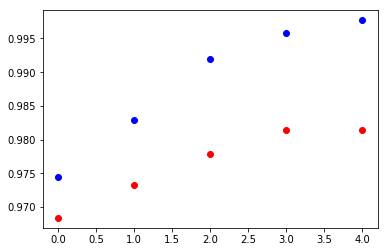

In [15]:
for e in range(n_epochs):
    
    #shuffle dataset
    # shuffling helps remove possible serial-relations between data, and reduces 'memorisation'
    np.random.seed(138)
    shuffle_index = np.random.permutation(data_size)
    X, Y = X[:,shuffle_index], Y[:,shuffle_index]
    
    #SGD with momentum
    loss = SGD(batch_size,X,Y,mnist_net,lr,beta)
    
    #decay helps decrease the size of steps over time, improving stability and convergence
    lr = lr*lr_decay
    
    #train accuracy
    H = mnist_net.f_pass(X)
    O = inv_one_hot(H)
    L = inv_one_hot(Y)
    tr_acc = model_accuracy(O,L)
    
    #test accuracy
    H = mnist_net.f_pass(X_test)
    O = inv_one_hot(H)
    L = inv_one_hot(Y_test)
    acc = model_accuracy(O,L)
    
    #plot train accuracy and test accuracy vs epochs
    plt.plot(e,tr_acc, 'bo')
    plt.plot(e,acc,'ro')
    clear_output()
    print(f"epoch:{e+1}/{n_epochs} | Loss:{loss:.4f} | Train Accuracy: {tr_acc:.4f} | Test_Accuracy:{acc:.4f}")

plt.show()